## The awesomeness of Numpy arrays
Let's see some things we can do with numpy arrays. First, we can retrieve specific subsets of an array by indexing:

In [1]:
import numpy as np
from IPython.display import Audio
from scipy.io.wavfile import read, write
(fs, x) = read("../audio/vignesh.wav")

a = x[0:50] # gives us the first 50 samples or sample 0 through 49 (or first 50 samples)
b = x[-50:] # gives us the last 50 samples
a

array([ 5,  7,  5, 11, 12,  5, 13, 10, 24, 15, 27, 12, 23, 18, 33, 32, 24,
       23, 22, 25, 21, 25, 22, 17, 12, 11, 12, 17, 18, 16, 18, 17, 17, 19,
       21, 31, 20, 26, 20, 27, 31, 37, 39, 34, 42, 38, 38, 30, 27, 19],
      dtype=int16)

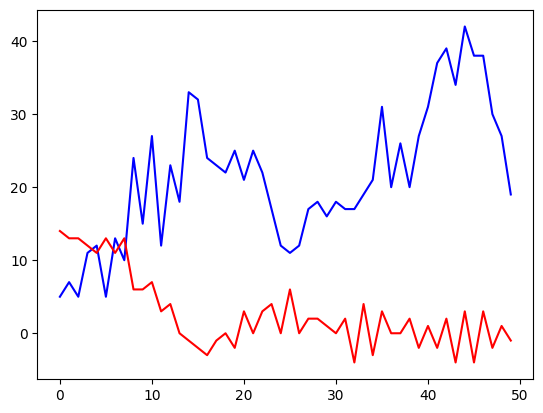

In [2]:
import matplotlib.pyplot as plt
#%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
plt.plot(a, 'b',  b, 'r')

Math functions are applied element-wise in numpy arrays, which is not the same behavior as python lists. **Lists and arrays are not the same thing!**

For example: adding two lists in python simply concatenates, while adding arrays results in element- (or vector-) wise addition.

In [ ]:
#LIST BEHAVIOR:

l1 = ['Hello']
l2 = ['World']
l1 + l2 

In [ ]:
#MORE LIST BEHAVIOR:
l1 = [0,1,2,3]
l2 = [4,5,6,7]
l2 + l1  

#### ARRAY BEHAVIOR

if we convert these lists into numpy arrays and add them, notice the result...

In [ ]:
#import numpy as np
a = np.arange(100000)


In [ ]:
a*8

In [ ]:
a1 = np.array(l1)
a2 = np.array(l2)
a2 + a1

So returning to our sound file... if we *do* want to concatenate, we need a numpy function (because in digital audio we always want do deal with arrays; they are more efficient).

In [ ]:
c = np.concatenate((a,b)) # remember "a" and "b" were the first and last 50 samples
plt.plot(c) # more on concatenate later...

However, if we want to add the samples together...
(note what happens to the amplitude)

In [ ]:
c = a + b
plt.plot(c) 

In the case of adding, what happens if the arrays are not of the same length? 
Test this yourself: Take a moment to make two arrays, but make them different lengths and then add together and see what happens.

In [ ]:
# Make an array by simply placing a list inside the numpy array function:
my_array = np.array([0,1,1,0])

### Creating Arrays

The above "manual" way of creating an array is useful only if you have a very short list. Sometimes you want to make a very large or complex array. In this case, you'll want a function to help you make the list in the first place. Enter two functions we will be using **a lot:**

* np.arange()
* np.linspace()

In [ ]:
#recall:
import numpy as np
?np.arange

In [ ]:
#What will this do?
n = np.arange(100,10,-10)
n

In [ ]:
?np.linspace 

In [ ]:
n2 = np.linspace(560,627,100)
n2

The difference between these two functions is that `np.linspace()` enables you to control the precise end values (when you want to get n number of samples between known values x and y), whereas `np.arange()` gives you more direct control over the increments between values in the sequence (you want to generate samples spaced n apart between x and y).

Although ultimately both functions do the same thing, you'll come to realize one may be handier than the other in different situations.

### Array Indexing
Recall: Index arrays by using square brackets (just like lists). A[x] will index the xth+1 item (because Python indexing starts from zero.) So calling A[5] will give you the sixth element of A, or the thing at the fifth index position.  

You can also give it a range (e.g., A[5:10]), and you can also call a range from the end by prepending a "-" sign like in the example below. Finally, you can increment by adding another value after the colon.

In [ ]:
x = np.arange(200)

In [ ]:
a = x[50] # gives the 51st element of x
b = x[0:50] # gives us the first 50 samples or sample 0 through 49
c = x[-100:] # gives us the last 100 samples
d = x[0:100:2] # gives us every other sample across the first 100 samples. 

In [ ]:
e = a+b # a should be length 1 and b should be length 50. What will happen if you try to run?

In [ ]:
e

This added the value of each element of "a" to each element of "b" (because the dimensions of the 
two vectors could be interpreted)

In [ ]:
e

In [ ]:
e = b + c # b should be length 50 and c should be length 100
e

In order to add, subtract, multiply, etc. two or more arrays together, their shapes are important. (Broadcasting is complicated and we won't get into it here.) Most of the time you'll be trying to modify an entire array by adding, subtracting or multiplying by a single value, or else adding two arrays of the same length together. 

In [ ]:
np.shape(x)

What else can we do with arrays? We can apply basic math functions to them, and do lots of other stuff. We'll get back to this later but if you're impatient you can [read the documentation](https://docs.scipy.org/doc/numpy/user/quickstart.html).

## Basic math

In [ ]:
a = x*3
#what will this do to the shape if you plot?
plt.plot(a)

### Writing audio files
OK, let's say we want to *write* a .wav file from a numpy array. No problem. We just call the `write` function from `Scipy.io.wavfile`, and pass the function the name of the file we want to create, and a sample rate:

In [ ]:
c = x[0:50000] + x[-50000:]
from scipy.io.wavfile import write
write('test_c.wav', 44100, c) # name you want to call your new file, sample rate, data

We will be using the "Audio" function from Ipython for listening to sounds.

Note: **ALWAYS BE CAREFUL WHEN LISTENING!!!**

In [ ]:
from IPython.display import Audio
Audio("../audio/vignesh.wav") #original vignesh.wav file

However, we can also just pass a numpy array directly to the Audio module:

In [ ]:
# make some random noise:
x = np.random.uniform(low = -1, high = 1, size = 10000)

Audio(x, rate=22050) 

## Useful References
Numpy also provides many functions to create arrays that will prove useful later on...

In [ ]:
myarray = np.array([1,2,3,4,5,6]) #single array
myarray2 = np.array([[1,2,3],[4,5,6]]) # multidimentional array of shape (2,3)
zeros = np.zeros(7) #array of length 7 filled with all zeros
ones = np.ones(7) #array of length 7 filled with all ones
static = np.full(7,2) # array of length 7 filled with a number I chose (2).
random = np.random.random(7) #array of length 7 filled with random values between 0 and 1
random5 = np.random.uniform(0,5,7) #from, to, length -- note that it returns floating values

Let's take advantage of some numpy features to continue manipulating our audio file.  
## We can reverse the values

In [ ]:
import numpy as np
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.flip(x)
y

## We can randomize the elements inside
Caution: there are a few ways to do this and some do it "in place" (meaning they overwrite the variable! Be careful!)

In [ ]:
import numpy as np
x = np.array([1,2,3,4,5,6,7,8])
y = np.random.permutation(x) #uses every element once. Leaves original variable alone.
x

In [ ]:
np.random.shuffle(x) #uses every element once. Caution! Changes original variable
x

In [ ]:
x = np.arange(10) #resetting x
np.random.choice(x, 10) # returns random values from array with replacement. Default return length is one.

Notice this one samples with replacement, so it doesn't necessarily use every element once.

We can also use the `.random` module to generate random arrays of elements from scratch:

In [ ]:
a = np.random.sample(50) #returns 50 floating values between 0 and 1
a

In [ ]:
a = np.random.uniform(-1, 1, 10) #low, high, size; returns floats between low and high
a

In [ ]:
a = np.random.randint(0,5,20) #from, to, size; draws random INTEGERS from range (not including "to" value)
a

## Remove/delete values
The "delete" function in numpy technically cannot delete an item from your array. However, you can construct a new array minus the values you don't want, like this:

In [ ]:
x = np.arange(2,12)
index = [2, 3, 6]
new_x = np.delete(x, index)
new_x

In [ ]:
np.delete(x, -4)

## Add/append values
With python lists if you add lists together, you append. But with arrays if you add them together you get vector-wise calculation across the two arrays. So to concatenate we need:

In [ ]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([1,2,3,4,5,6,7,8,9,10])
z = np.concatenate((x,y))
z

Note the use of double parentheses above. The set of arrays to be appended is a single argument so if you don't include the parentheses the thing after the comma gets interpreted as the second agrument to the function (which happens to be the axis to concatenate along with default = none.) 

Check out the documentaton for more info, or experiment with different axes to see what happens (0 or 1). Note that the append method does something very similar. (More later).

## Repeat elements
We can also use a function calle `np.tile` to repeat some array by some given number of repetitions:

In [ ]:
x = np.array([0,1,2,3])
np.tile(x,3)

There's also a function called `np.repeat` which can repeat individual elements of an array:

In [ ]:
x = np.array([0,1,2,3])
np.repeat(x,2)

#### Getting ahead of ourselves...
Notice you could use the `np.zeros` or `np.ones` functions in combination with the above functions to create boolean masks with another function called `np.ma.make_mask` For example:

In [ ]:
#Find all values that are not zero (or: return array without any zero values)
x = np.zeros(10)
y = np.ones(10)
z = np.concatenate((x,y))
m = np.ma.make_mask(z)
c = np.random.random(20)
z[m]

## Insert values
You can also insert values by using `np.insert` and providing a new array of numbers that will be placed before the indices specified:

In [ ]:
x = np.arange(0,4)
np.insert(x, 3, [2.5, 2.75]) #arguments: array to be modified, index to place before, items to place.


## Change values
You can change values by indexing a specific location:

In [ ]:
#Single value
x = np.arange(9)
x[2] = 100
x

In [ ]:
#Range of values
x = np.arange(9)
x[2:4] = 100
x

In [ ]:
#Multiple values
x = np.arange(9)
x[[2,4,5]] = 100
x

## Split arrays
The `np.array_split` function will split an array into N equal sections. Unlike the `np.split` function, it will not throw an error if N does not evenly divide into the array, as below:

In [ ]:
x = np.arange(8.0)
y = np.array_split(x, 3)
y